In [23]:
import pandas as pd

# 데이터 로드
file_path = 'amazon_uk_shoes_products_dataset_2021_12.csv'
data = pd.read_csv(file_path)

# 데이터프레임 정보 확인
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6823 non-null   object 
 1   product_name       6823 non-null   object 
 2   reviewer_name      6823 non-null   object 
 3   review_title       6822 non-null   object 
 4   review_text        6814 non-null   object 
 5   review_rating      6823 non-null   float64
 6   verified_purchase  6823 non-null   bool   
 7   review_date        6823 non-null   object 
 8   helpful_count      1953 non-null   object 
 9   uniq_id            6823 non-null   object 
 10  scraped_at         6823 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 539.8+ KB


,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


In [24]:
# 결측값 제거
data.dropna(inplace=True)

# 결측값 제거 후 데이터프레임 정보 확인
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1950 entries, 0 to 6816
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                1950 non-null   object 
 1   product_name       1950 non-null   object 
 2   reviewer_name      1950 non-null   object 
 3   review_title       1950 non-null   object 
 4   review_text        1950 non-null   object 
 5   review_rating      1950 non-null   float64
 6   verified_purchase  1950 non-null   bool   
 7   review_date        1950 non-null   object 
 8   helpful_count      1950 non-null   object 
 9   uniq_id            1950 non-null   object 
 10  scraped_at         1950 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 169.5+ KB


In [25]:
!pip install nltk
!pip install seaborn
!pip install matplotlib

In [26]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# NLTK 데이터 다운로드 (최초 실행 시 한 번만 필요)
nltk.download('stopwords')
nltk.download('wordnet')

# 불용어 집합 및 표제어 추출기 초기화
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
import re

def preprocess_text(text):
    # 소문자 변환 및 특수 문자 제거
    text = re.sub(r'[^\w\s]', '', text.lower())
    # 토큰화
    words = text.split()
    # 불용어 제거 및 표제어 추출
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# 'review_text' 열에 대해 불용어 제거 전후 및 표제어 추출 후의 텍스트 생성
data['processed_text'] = data['review_text'].apply(preprocess_text)


In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# VADER 초기화
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# 리뷰 텍스트에 대한 감정 점수 계산
data['sentiment_score'] = data['processed_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 감정 점수로부터 레이블 생성
data['sentiment_label'] = data['sentiment_score'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
from sklearn.model_selection import train_test_split

# 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['sentiment_label'], test_size=0.2, random_state=42)

# 학습 세트와 테스트 세트의 일부 데이터 출력
print(X_train.head(), y_train.head())


2960    ich liebe die schuhe sehr gutes laufgefühl hal...
1937    back heel cup soft rebound stepped onto older ...
5514    putting tying shoesespecially time go one daug...
5632        fit good little roomy needed room orthopedics
3098    looked premium received however daughter start...
Name: processed_text, dtype: object 2960    positive
1937    positive
5514    positive
5632    positive
3098    negative
Name: sentiment_label, dtype: object


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 로지스틱 회귀 모델 및 파이프라인 설정
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])


In [32]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

# GridSearchCV를 통한 모델 학습
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'clf__C': 10, 'clf__solver': 'lbfgs'}


In [33]:
from sklearn.metrics import accuracy_score

# 테스트 세트 예측
y_pred = grid_search.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8282051282051283


In [34]:
from sklearn.model_selection import cross_val_score

# K-fold Cross Validation을 사용하여 평가
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)

# 평균 정확도 계산
mean_accuracy = cv_scores.mean()
print("Mean CV Accuracy:", mean_accuracy)


Mean CV Accuracy: 0.8423076923076923


In [35]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# ROC-AUC 계산 (다중 클래스)
roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test), multi_class='ovr')
print("ROC-AUC:", roc_auc)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 분류 보고서 생성
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])
print("Classification Report:\n", report)


ROC-AUC: 0.9276876314437653
Confusion Matrix:
 [[ 38   5  26]
 [  3  50  13]
 [  5  15 235]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.55      0.66        69
     neutral       0.71      0.76      0.74        66
    positive       0.86      0.92      0.89       255

    accuracy                           0.83       390
   macro avg       0.80      0.74      0.76       390
weighted avg       0.83      0.83      0.82       390



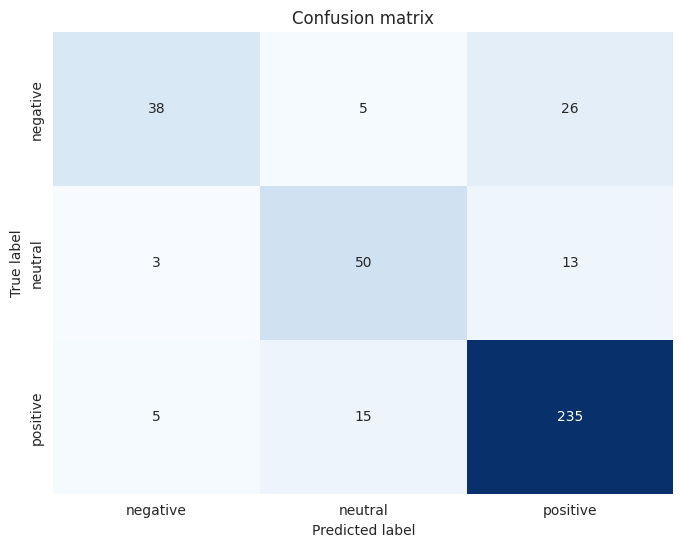

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.show()

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes=['negative', 'neutral', 'positive'])


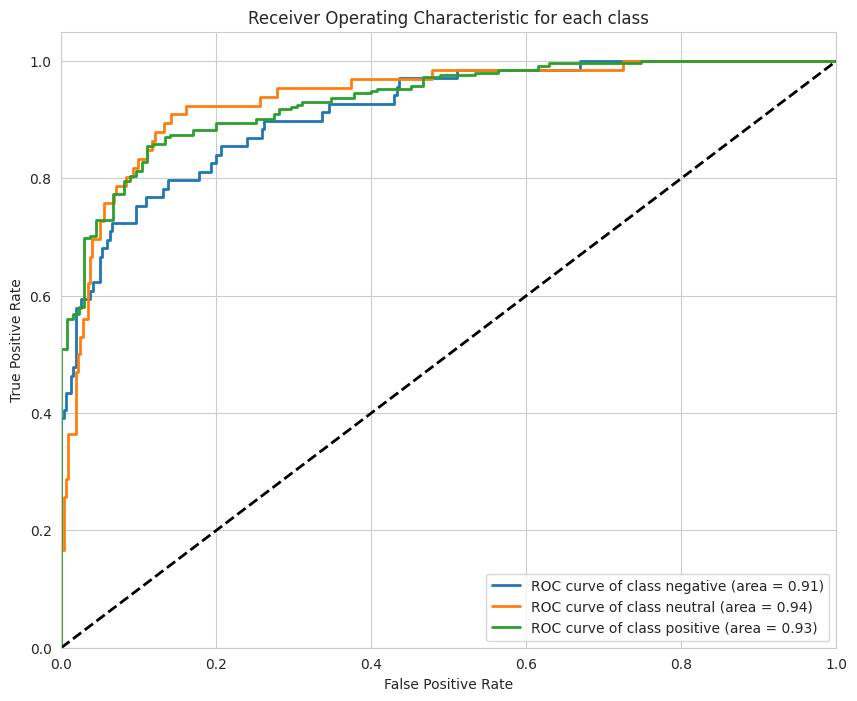

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# 레이블 이진화
y_test_bin = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])
y_pred_prob = grid_search.predict_proba(X_test)

# 클래스 수 설정
n_classes = y_test_bin.shape[1]

# ROC 곡선 및 AUC 계산
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 새로운 색상 팔레트 사용
colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c'])  # 블루, 오렌지, 그린

# 모든 클래스에 대해 ROC 곡선 시각화
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(['negative', 'neutral', 'positive'][i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()
